# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import tweepy
import json
from timeit import default_timer as timer
import re
import datetime

%matplotlib inline

## Data Gathering

### Read the downloaded `twitter_archive_enhanced.csv` file from disk.

In [2]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Download `image_predications.tsv` from udacity server

In [3]:
# Using the request library to download 'image_predications.tsv' file online.
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_prediction_url)
response.status_code

200

In [4]:
# Get text in file using response.text
response_text = response.text

# Read text data into pandas DataFrame
df_ipred = pd.read_csv(io.StringIO(response_text), sep='\t') # df_ipred -> dataframe_imageprediction
df_ipred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
# Save text file locally to 'image_predictions.tsv'
with open('image_predictions.tsv', 'w') as f:
    f.write(response_text)
    
# Making sure file is saved
with open('image_predictions.tsv') as f:
    print(f.readline())

tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog



### Using `tweepy` library to query additional data via Twitter API and save json to `tweet_json.txt`

In [6]:
# # Authenticating tweepy api with consumer and access keys and secrets gotten from my twitter developer dashboard.
# # Not keys and secrets not included here for security reasons.

# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# # Downloading and saving each tweet_json in a 'tweet_json.txt' file
# #
# # NOTE: authenticated 'api' object has been created initially

# errors = [] # A list that holds all encountered errors

# timer_start = timer()
# with open('tweet_json.txt', 'w') as f:
#     # Looping through the tweet_ids in the df_archive dataframe and download tweet_json
#     for index, tweet_id in enumerate(df_archive.tweet_id):
#         try:
#             # api.get_status(_id) returns a 'tweepy.models.Status' that I can access using the dot('.') operator
#             # while adding a '._json' returns just the json part as a python dictionary
#             tweet_json = api.get_status(tweet_id)._json

#         except Exception as e:
#             # Append error
#             errors.append('{}: {}, tweeet_id: {}'.format(type(e).__name__, e.args, tweet_id))

#         else:
#             # Writing data to file
#             json.dump(tweet_json, f)
#             f.write('\n')

#         finally:
#             print('index: {}, tweet_id: {}'.format(index, tweet_id))

# timer_end = timer()
# print(timer_end - timer_start)

In [8]:
# errors

In [9]:
# Reading the 'tweet_json.txt' file into df_rt_fav
df_rt_fav = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open('tweet_json.txt', 'r') as f:
    for line in f:
        data = json.loads(line)
        tweet_json = {}
        tweet_json['tweet_id'] = data['id']
        tweet_json['retweet_count'] = data['retweet_count']
        tweet_json['favorite_count'] = data['favorite_count']
        
        df_rt_fav = df_rt_fav.append(tweet_json, ignore_index=True)

df_rt_fav = df_rt_fav.astype(np.int64)
df_rt_fav.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7167,34466
1,892177421306343426,5387,29874


## Assessing Data
### `df_archive` accessing

In [10]:
# I have exported the `twitter_archive_enhanced.csv` to google sheet for better visualization
#
# Now trying to get more about the datatypes for each columns 
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# I can see a couple of really high numerators and denominators, let's query this and export to google sheets for a better 
# visuals of this columns.
df_archive.query('rating_denominator > 10 or rating_numerator > 20').to_csv('data_issues.csv')

In [13]:
# Looking for duplicate tweets
df_archive.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [14]:
# View values in `source` column
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# Seems some lower case names are not real names

# find_lower = lambda x: re.search('^[a-z]', x)[0] if re.search('^[a-z]', x) else np.nan
# df_archive[~df_archive['name'].apply(find_lower).isnull()]['name'].value_counts().sort_index()

# Better
df_archive[df_archive['name'].str.contains('^[a-z]', regex=True)]['name'].value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [16]:
# Accessing dog stage columns
stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive.groupby(stage_list).size().reset_index(level=stage_list, name='count')

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


### `df_ipred` accessing

In [17]:
# Visualing a sample of df_ipred DataFrame
df_ipred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
849,695629776980148225,https://pbs.twimg.com/media/Cadfl6zWcAEZqIW.jpg,1,Old_English_sheepdog,0.693857,True,otterhound,0.232117,True,West_Highland_white_terrier,0.012867,True
559,677700003327029250,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian_husky,0.120849,True,junco,0.079206,False,malamute,0.063088,True
1289,751251247299190784,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,Walker_hound,0.178852,True,German_short-haired_pointer,0.115752,True,English_foxhound,0.113796,True
1366,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
1562,793500921481273345,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True


In [18]:
df_ipred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_ipred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# Looking for duplicate tweets
df_ipred.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

### `df_rt_fav` accessing

In [21]:
# Visualizing 10 sample from df_rt_fav DataFrame
df_rt_fav.sample(10)

,tweet_id,retweet_count,favorite_count
2281,666786068205871104,423,672
1930,673576835670777856,503,1262
1933,673355879178194945,510,1374
1230,710283270106132480,491,2046
1522,689154315265683456,923,2922
2147,669203728096960512,417,914
396,822872901745569793,40913,126557
469,814530161257443328,1770,8352
688,785515384317313025,1199,5930
1059,738156290900254721,594,2344


In [22]:
df_rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [23]:
df_rt_fav.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.418335e+17,2529.240653,7196.353674
std,6.824532e+16,4281.352850,11176.171705
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,511.500000,1250.000000
50%,7.178418e+17,1178.000000,3114.000000
75%,7.986692e+17,2925.500000,8780.500000
max,8.924206e+17,72461.000000,147735.000000


In [24]:
df_ipred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
#### `df_archive`
1. Missing values (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`).

2. Multiple values in `expanded_url`.

3. HTML tags in `source`

4. Erroneous datatypes (`tweet_id`, `timestamp`, `source`)

5. Incorrect rates (e.g, 75/10 instead of 9.75/10...)

6. Incorrect dog names (`a`, `such`, `quite` `None`...)

7. `None` in columns `name`, `doggo`, `floofer`, `pupper` and `puppo`.

#### `df_rt_fav`
8. Erroneous datatypes (`tweet_id`)

#### `df_ipred`
9. Erroneous datatypes (`tweet_id`)

10. Non descriptive column names (`p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog`)

### Tidiness issues
1. `doggo`, `floofer`, `pupper` and `puppo` should be under one variable name `dog_stage`.

2. Merge `df_rt_fav` with `df_archive`.

3. Same variables split to different columns `(p1, p2, p3), (p1_conf, p2_conf, p3_conf), (p1_dog, p2_dog, p3_dog)`.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Making copies of original dataframes
df_archive_copy = df_archive.copy()
df_ipred_copy = df_ipred.copy()
df_rt_fav_copy = df_rt_fav.copy()

### Issue #1 (Quality):
#### Define: Missing values in `df_archive`
> Tweets with `in_reply_to_status_id` and `retweeted_status_id` are retweets and not original tweets so we can use this column to drop rows that are retweets since we are only interested in original tweets.
>
> Afterwards we can drop the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` since thay are all linked to retweets.
>
> And then we can drop rows with missing `expanded_urls` since these tweets have no image in them.

#### Code

In [26]:
# Since NaN is not equal to NaN, query for rows where in_reply_to_status_id == in_reply_to_status_id will omit the nan values
#
# This applies to retweeted_status_id
index_to_drop = df_archive_copy.query('in_reply_to_status_id == in_reply_to_status_id or retweeted_status_id == retweeted_status_id').index
df_archive_copy.drop(index=index_to_drop, inplace=True)

In [27]:
# Awesome! Retweets have been dropped
#
# Now drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`
# and `retweeted_status_timestamp` columns since they are linked to retweets

columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_copy.drop(columns=columns_to_drop, inplace=True)

In [28]:
# Get row index to drop (Same concept applies since Nan is not equal to Nan)
index_to_drop = df_archive_copy.query('expanded_urls != expanded_urls').index
df_archive_copy.drop(index=index_to_drop, inplace=True)

#### Test

In [29]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Issue #2 (Quality):
#### Define: Multiple values in `expanded_url`.
> It turns out the urls seperated by commas are the same for most of the rows and for those that are not the same, the 2nd url is usually that for the tweet. So for rows with just 1 url, keep that, and for those with multiple url, pick the 2nd url.

#### Code

In [30]:
# Lambda function to select url
select_url = lambda expanded_url: expanded_url.split(',')[0] if len(expanded_url.split(',')) == 1 else expanded_url.split(',')[1]

In [31]:
# Select url
df_archive_copy.expanded_urls = df_archive_copy.expanded_urls.apply(select_url)

#### Test

In [32]:
for expanded_url in df_archive_copy.expanded_urls.sample(100):
    if len(expanded_url.split(',')) > 1:
        print('Test Failed!!!')
        break

### Issue #3 (Quality):
#### Define: HTML tags in `source`
> Extract main text from source

#### Code

In [33]:
# Extracting main string from source

"""
ext_function: Extracts string from source.

Keyword arguments:
source_str -- The source sting from df_archive
"""
ext_function = lambda source_str: source_str[source_str.index('>') + 1:source_str.index('</')]

# Apply ext_function to df_archive.source
df_archive_copy.source = df_archive_copy.source.apply(ext_function)

#### Test

In [34]:
df_archive_copy.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Issue #4 (Quality):
#### Define: Erroneous datatypes (`tweet_id`, `timestamp`, `source`)
> Use `pandas.Series.astype()` function to change `tweet_id` and `source` to `string` and `category` respectively.
>
> Use `pandas.to_datetime()` function to change the `timestamp` dtype from string to `datetime`.

#### Code

In [35]:
# Converting tweet_id to string
df_archive_copy.tweet_id = df_archive_copy.tweet_id.astype(str)

# Converting source to category
df_archive_copy.source = df_archive_copy.source.astype('category')

# Converting timestamp to datetime
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)

#### Test

In [36]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: category(1), datetime64[ns, UTC

### Issue #5 (Quality):
#### Define: Incorrect rates

In [37]:
# Tweet ids for tweets with incorrect rating
tweet_id_incorrect_ratings = ['835246439529840640',
 '832088576586297345',
 '810984652412424192',
 '832215909146226688',
 '786709082849828864',
 '778027034220126208',
 '680494726643068929',
 '775096608509886464',
 '740373189193256964',
 '775096608509886464',
 '775096608509886464',
 '740373189193256964',
 '722974582966214656',
 '716439118184652801',
 '682962037429899265',
 '666287406224695296']
len(tweet_id_incorrect_ratings)

16

In [38]:
df_archive_copy.query('tweet_id in @tweet_id_incorrect_ratings').shape

(9, 12)

> Turns out a couple of the incorrect rating values have been cleaned by dropping retweets. Here we will clean the remaining `8` incorrect rating.
>
> tweet_id `810984652412424192` has no rating. `24/7` is not a rate so we drop that row.
>
> tweet_ids `[786709082849828864, 778027034220126208, 680494726643068929]` has fractional numerators not integer, we change `rating_numerator` to float dtype and then extract and save the fraction.
>
> The second divisions in the text of the tweets with tweet_ids `[740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265]` should serve as the rating.
>
> Scale `rating_denominator` above 10 to 10.

#### Code

In [39]:
# Drop row with tweet_id 810984652412424192
index_to_drop = df_archive_copy.query('tweet_id == "810984652412424192"').index
df_archive_copy.drop(index=index_to_drop, inplace=True)

In [40]:
# Change rating_numerator to float dtype 
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype('float64')

# tweet_ids with fractional rating numerators
frac_tweet_ids = ["786709082849828864", "778027034220126208", "680494726643068929"]
# tweets with fractional rating numerators
frac_tweets = df_archive_copy.query('tweet_id in @frac_tweet_ids').text

for index, text in frac_tweets.items():
    rate = re.search('\d+(.?\d+)?/\d+', text)[0]
    rating_num = rate.split('/')[0]
    rating_denom = rate.split('/')[1]
    
    df_archive_copy.loc[index, 'rating_numerator'] = float(rating_num)
    df_archive_copy.loc[index, 'rating_denominator'] = int(rating_denom)

In [41]:
# tweet_ids with second divisions as the rating
tweet_ids_2_div = ["740373189193256964", "722974582966214656", "716439118184652801", "682962037429899265", "666287406224695296"]
# tweets with second divisions as rating
tweets_2_div = df_archive_copy.query('tweet_id in @tweet_ids_2_div').text

for index, text in tweets_2_div.items():
    rate = re.findall('\d+/\d+', text)
    rating_num = rate[1].split('/')[0]
    rating_denom = rate[1].split('/')[1]
    
    df_archive_copy.loc[index, 'rating_numerator'] = float(rating_num)
    df_archive_copy.loc[index, 'rating_denominator'] = int(rating_denom)

In [42]:
# Scale rating denominator above 10 to 10
indexes_toscale = df_archive_copy.query('rating_denominator != 10').index
for index in indexes_toscale:
    # Get the factor to scale down with
    scale_down_factor = df_archive_copy.loc[index]['rating_denominator']/10
    
    # Scale both rating_numerator and rating_denominator by scale_down_factor
    df_archive_copy.loc[index, 'rating_numerator'] = df_archive_copy.loc[index, 'rating_numerator']/scale_down_factor
    df_archive_copy.loc[index, 'rating_denominator'] = df_archive_copy.loc[index, 'rating_denominator']/scale_down_factor

#### Test

In [43]:
df_archive_copy.query('rating_denominator != 10').shape

(0, 12)

In [44]:
df_archive_copy.query('tweet_id in @tweet_id_incorrect_ratings')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1068,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.00,10,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.00,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.00,10,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13+00:00,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10.00,10,Darrel,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.00,10,an,None,None,None,None


### Issue #6 (Quality):
#### Define: Incorrect dog names, `a`, `such`, `quite` `None`...
> Seems all names with lower_case are incorrect.
>
> Create a function that extracts name from `text` column and apply that function to the `text` column asssigning the returned value to `name` for rows with names in lowercase.
>
> Replace `None`s in `name` to `Nan`.

#### Code

In [45]:
""" There 3 case when name is present in text

    Case 1: The word "named" is present in text
    Case 2: The phrase "name is" is present in text
    Case 3: "is Name" (For this case, Name begins with an uppercase)
"""
def extract_name(text):
    # Case 1 when the word "named" is present in text
    text_splited = text.split('named ')
    
    # Case 2 when the phrase "name is" is present in text
    if len(text_splited) == 1: text_splited = text.split('name is ')
        
    # Case 3 when "is Name" is present in text.
    if len(text_splited) == 1: text_splited = text.split('is ')
    
    # Clean name with just single word
    name = text_splited[1].split()[0].strip('.') if len(text_splited) > 1 and len(text_splited[1].split()) > 0 else '' 
        
    # Make sure word returned is a name by checking if it starts with uppercase, else it not a name hence return Nan
    return name if len(name) > 0 and name[0].isupper() else np.nan

In [46]:
# Get the index of the rows with names in small letters
indexes_toclean = df_archive_copy[df_archive_copy['name'].str.contains('^[a-z]', regex=True)].index

# Extract name from text for case when name exist else set name to Nan.
df_archive_copy.loc[indexes_toclean, 'name'] = df_archive_copy.loc[indexes_toclean, 'text'].apply(extract_name)

In [47]:
# Now replace None with Nan
df_archive_copy['name'].replace('None', np.nan, inplace=True)

#### Test

In [48]:
df_archive_copy['name'].sample(10)

947        NaN
482        NaN
2012    Ridley
1236      Kane
1172    Ralphé
1095       NaN
1268     Cecil
1771     Rosie
2159     Keith
1343       NaN
Name: name, dtype: object

### Issue #8 & 9 (Quality):
#### Define: Erroneous datatypes (`tweet_id`) in `df_ipred` and `df_rt_fav`
> Use `pandas.Series.astype()` function to change `tweet_id` to string for both dataframes.

#### Code

In [49]:
# For df_ipred
df_ipred_copy.tweet_id = df_ipred_copy.tweet_id.astype(str)

# For df_fav_rt
df_rt_fav_copy.tweet_id = df_rt_fav_copy.tweet_id.astype(str)

#### Test

In [50]:
print("df_ipred: dtype = {}\ndf_rt_fav: dtype = {}".format(df_ipred_copy.tweet_id.dtype, df_rt_fav_copy.tweet_id.dtype))

df_ipred: dtype = object
df_rt_fav: dtype = object


>
>
> **Quality issues `7` and `10` will be resolved while solving tidyness issues `1` and `3` respectively**
>
>

### Issue #1 (Tidy):
#### Define: `doggo`, `floofer`, `pupper` and `puppo` should be under one variable name `dog_stage` in `df_archive`
> Replace `None` and `Nan` with `''` in `doggo`, `floofer`, `pupper` and `puppo`.
>
> Create column `dog_stage` set it's values to `doggo + floofer + pupper + puppo`. It turns out `doggo` is the only stage that appears together with other stages. For those cases, use `, ` to seperate the stages.
>
> Drop `doggo`, `floofer`, `pupper` and `puppo` from dataframe.
>
> Replace `''` with `Nan` **(Fixes quality issue #8 as well)**

In [51]:
stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_copy.groupby(stage_list).size().reset_index(level=stage_list, name='count')

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1758
1,None,None,None,puppo,23
2,None,None,pupper,None,220
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


#### Code

In [52]:
# Replace None and Nan with ''
for stage in stage_list:
    df_archive_copy[stage].replace('None', '', inplace=True)
    df_archive_copy[stage].replace(np.nan, '', inplace=True)

In [53]:
# Join dog stages to same column `dog_stage
df_archive_copy['dog_stage']  = df_archive_copy['doggo'] + df_archive_copy['floofer'] + df_archive_copy['pupper'] + df_archive_copy['puppo']

In [54]:
# Seperate multiple dog_stage with `, `
df_archive_copy.loc[df_archive_copy['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_archive_copy.loc[df_archive_copy['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive_copy.loc[df_archive_copy['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

In [55]:
# Drop dog_stages from df_archive_copy
df_archive_copy.drop(columns=stage_list, inplace=True)

In [56]:
# Replace '' with Nan
df_archive_copy['dog_stage'].replace('', np.nan, inplace=True)

#### Test

In [57]:
df_archive_copy['dog_stage'].value_counts()

pupper            220
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #2 (Tidy):
#### Define: Merge `df_rt_fav` with `df_archive`.
> Merge `df_rt_fav_copy` to `df_archive_copy` with the `df.merge()` funtion.

#### Code

In [58]:
# Merging df_rt_fav_copy to df_archive_copy
df_archive_copy = df_archive_copy.merge(df_rt_fav_copy, left_on='tweet_id', right_on='tweet_id')

#### Test

In [59]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,7167,34466
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,5387,29874
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,3552,22496
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,7386,37677
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,7923,35990


### Issue #3 (Tidy):
#### Define: Same variables split to different columns `(p1, p2, p3), (p1_conf, p2_conf, p3_conf), (p1_dog, p2_dog, p3_dog)`.
> Use `pd.melt()` to melt `p1`, `p2` and `p3` into `prediction_no` and `prediction`. Then set prediction_no to 1, 2, and 3 and afterwards drop `p1`, `p2` and `p3` from `df_ipred_copy` and `['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog']` from melted df.
>
> *Melt* `p1_conf`, `p2_conf` and `p3_conf` into `prediction_no` and `confidence`. Then set prediction_no to 1, 2, and 3 and afterwards drop `p1_conf`, `p2_conf` and `p3_conf` from `df_ipred_copy` and `['jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog']` from melted df.
>
> *Melt* `p1_dog`, `p2_dog` and `p3_dog` into `prediction_no` and `is_dog`. Then set prediction_no to 1, 2, 3 and afterwards drop `p1_dog`, `p2_dog` and `p3_dog` from `df_ipred_copy` and `['jpg_url', 'img_num']` from melted df.
>
> *Merge* df_prediction, df_confidence and df_is_dog on `tweet_id` and `prediction_no`.

#### Code

In [60]:
# Lambda function to split string by '_' and return str.split()[0].strip('p') as prediction
select_prediction = lambda prediction_no: prediction_no.split('_')[0].strip('p')

> Melt columns

In [61]:
# Melting `p1`, `p2` and `p3` into `prediction_no` and `prediction`
pred_id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog']
df_ipred_copy_pred = pd.melt(df_ipred_copy, id_vars=pred_id_vars, value_vars=['p1', 'p2', 'p3'], var_name='prediction_no', value_name='prediction')

# Setting prediction number to 1, 2, and 3
df_ipred_copy_pred.prediction_no = df_ipred_copy_pred.prediction_no.apply(select_prediction)

# Droping p1, p2, and p3 from df_ipred_copy
df_ipred_copy.drop(columns=['p1', 'p2', 'p3'], inplace=True)
# Droping ['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'] from df_ipred_copy_pred
df_ipred_copy_pred.drop(columns=['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], inplace=True)

In [62]:
# Melting 'p1_conf', 'p2_conf' and 'p3_conf' into `prediction_no` and `confidence`
conf_id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog']
df_ipred_copy_conf = pd.melt(df_ipred_copy, id_vars=conf_id_vars, value_vars=['p1_conf', 'p2_conf', 'p3_conf'], var_name='prediction_no', value_name='confidence')

# Setting prediction number to 1, 2, and 3
df_ipred_copy_conf.prediction_no = df_ipred_copy_conf.prediction_no.apply(select_prediction)

# Droping 'p1_conf', 'p2_conf', 'p3_conf' from df_ipred_copy
df_ipred_copy.drop(columns=['p1_conf', 'p2_conf', 'p3_conf'], inplace=True)
# Droping ['jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog'] from df_ipred_copy_conf
df_ipred_copy_conf.drop(columns=['jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog'], inplace=True)

In [63]:
# Melting 'p1_dog', 'p2_dog', 'p3_dog' into `prediction_no` and `is_dog`
is_dog_id_vars = ['tweet_id', 'jpg_url', 'img_num']
df_ipred_copy_is_dog = pd.melt(df_ipred_copy, id_vars=is_dog_id_vars, value_vars=['p1_dog', 'p2_dog', 'p3_dog'], var_name='prediction_no', value_name='is_dog')

# Setting prediction number to 1, 2, and 3
df_ipred_copy_is_dog.prediction_no = df_ipred_copy_is_dog.prediction_no.apply(select_prediction)

# Droping 'p1_dog', 'p2_dog', 'p3_dog' from df_ipred_copy
df_ipred_copy.drop(columns=['p1_dog', 'p2_dog', 'p3_dog'], inplace=True)
# Droping ['jpg_url', 'img_num'] from df_ipred_copy_is_dog
df_ipred_copy_is_dog.drop(columns=['jpg_url', 'img_num'], inplace=True)

> Merge columns

In [64]:
# Merging df_ipred_copy_pred to df_ipred_copy
df_ipred_copy = df_ipred_copy.merge(df_ipred_copy_pred, left_on='tweet_id', right_on='tweet_id')

In [65]:
# Merging df_ipred_copy_conf to df_ipred_copy
df_ipred_copy = df_ipred_copy.merge(df_ipred_copy_conf, left_on=['tweet_id', 'prediction_no'], right_on=['tweet_id', 'prediction_no'])

# Merging df_ipred_copy_is_dog to df_ipred_copy
df_ipred_copy = df_ipred_copy.merge(df_ipred_copy_is_dog, left_on=['tweet_id', 'prediction_no'], right_on=['tweet_id', 'prediction_no'])

In [66]:
df_ipred_copy.prediction_no = df_ipred_copy.prediction_no.astype('int64')

#### Test

In [67]:
df_ipred_copy.head()

,tweet_id,jpg_url,img_num,prediction_no,prediction,confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [68]:
df_ipred_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       6225 non-null   object 
 1   jpg_url        6225 non-null   object 
 2   img_num        6225 non-null   int64  
 3   prediction_no  6225 non-null   int64  
 4   prediction     6225 non-null   object 
 5   confidence     6225 non-null   float64
 6   is_dog         6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 346.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Storing to csv

In [69]:
# Storing df_archive_copy as twitter_archive_master.csv
df_archive_copy.to_csv('twitter_archive_master.csv', index=False)

# Storing df_ipred_copy as image_predications_master.csv
df_ipred_copy.to_csv('image_predications_master.csv', index=False)

### Storing to sql

In [70]:
from sqlalchemy import create_engine

# Using SQL Alchemy create engine to create sql engine
engine = create_engine('sqlite:///weratedog.db')

In [71]:
# store df_archive_copy to weratedog.db
df_archive_copy.to_sql('twitter_archive_master', engine, index=False)

In [72]:
# store df_ipred_copy to weratedog.db
df_ipred_copy.to_sql('image_predications_master', engine, index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### What time of day does @dog_rates post the most?

In [73]:
# Let's split our time values into 4 categories;
# * Early Morning [00:00:00 - 06:00:00)
# * Morning [06:00:00 - 12:00:00)
# * Afternoon [12:00:00 - 18:00:00)
# * Night [18:00:00 - 00:00:00)

time_category = {} # Dictionary to hold the time category and it's index in the series

for index, time in df_archive_copy.timestamp.dt.time.items():
    if time < datetime.time(6, 0, 0):
        time_category[index] = 'early_morning'
    elif time < datetime.time(12, 0, 0):
        time_category[index] = 'morning'
    elif time < datetime.time(18, 0, 0):
        time_category[index] = 'afternoon'
    else:
        time_category[index] = 'night'
        
time_category = pd.Series(time_category)

# Create category for time
ordered_category = ['early_morning', 'morning', 'afternoon', 'night']
ordered_category = pd.api.types.CategoricalDtype(categories=ordered_category, ordered=True)

# Set category to time
time_category = time_category.astype(ordered_category)

# Join our "time_category" series to df_archive_copy
df_archive_copy['time_category'] = time_category
df_archive_copy.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,time_category
1819,670807719151067136,2015-11-29 03:33:17+00:00,Twitter for iPhone,"Say hello to Andy. He can balance on one foot,...",https://twitter.com/dog_rates/status/670807719...,11.0,10,Andy,NaN,440,1067,early_morning
1185,698355670425473025,2016-02-13 03:59:01+00:00,Twitter for iPhone,This is Jessiga. She's a Tasmanian McCringlebe...,https://twitter.com/dog_rates/status/698355670...,10.0,10,Jessiga,NaN,413,1742,early_morning
1626,674805413498527744,2015-12-10 04:18:42+00:00,Twitter for iPhone,When your entire life is crumbling before you ...,https://twitter.com/dog_rates/status/674805413...,10.0,10,NaN,NaN,324,781,early_morning
444,800388270626521089,2016-11-20 17:20:08+00:00,Twitter for iPhone,This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12.0,10,Doc,floofer,2677,10832,afternoon
278,829861396166877184,2017-02-10 01:15:49+00:00,Twitter for iPhone,This is Mia. She already knows she's a good do...,https://twitter.com/dog_rates/status/829861396...,12.0,10,Mia,NaN,1830,11769,early_morning
231,837471256429613056,2017-03-03 01:14:41+00:00,Twitter for iPhone,This is Vincent. He's suave as h*ck. Will be y...,https://twitter.com/dog_rates/status/837471256...,12.0,10,Vincent,NaN,2115,12233,early_morning
1410,683142553609318400,2016-01-02 04:27:31+00:00,Twitter for iPhone,Meet Brandy. She's a member of the Bloods. Men...,https://twitter.com/dog_rates/status/683142553...,9.0,10,Brandy,pupper,976,2707,early_morning
1243,693267061318012928,2016-01-30 02:58:42+00:00,Vine - Make a Scene,This is Oscar. He can wave. Friendly af. 12/10...,https://vine.co/v/i5n2irFUYWv,12.0,10,Oscar,NaN,753,2244,early_morning
1889,669603084620980224,2015-11-25 19:46:30+00:00,Twitter for iPhone,Very human-like. Cute overbite smile *finger t...,https://twitter.com/dog_rates/status/669603084...,10.0,10,NaN,NaN,326,869,night
254,833722901757046785,2017-02-20 17:00:04+00:00,Twitter for iPhone,This is Bronte. She's fairly h*ckin aerodynami...,https://twitter.com/dog_rates/status/833722901...,13.0,10,Bronte,NaN,3058,20068,afternoon


In [74]:
# Getting values counts for each time category
data_to_plot = df_archive_copy['time_category'].value_counts().sort_index()
data_to_plot

early_morning    1070
morning             4
afternoon         473
night             538
Name: time_category, dtype: int64

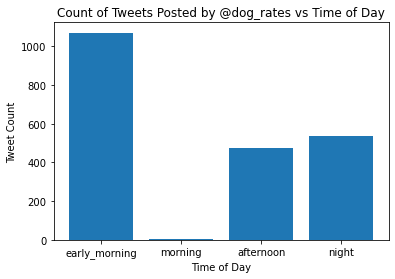

In [75]:
# Plotting
plt.bar(data_to_plot.index,  data_to_plot)
plt.xlabel('Time of Day');
plt.ylabel('Tweet Count');
plt.title('Count of Tweets Posted by @dog_rates vs Time of Day');

> Seems @dog_rates is a night owl with most of his post at night and in the early hours of the morning. From 6:00 PM to 6:00 AM.

#### What time of day did @dog_rates have the highest retweet, highest retweets on average, lowest retweet?

In [76]:
# Get max retweet counts for each time category
retweet_counts_max = df_archive_copy.groupby('time_category').retweet_count.max().values
time_category_max = df_archive_copy.groupby('time_category').retweet_count.max().index

# Get mean retweet counts for each time category
retweet_counts_avg = df_archive_copy.groupby('time_category').retweet_count.mean().values
time_category_avg = df_archive_copy.groupby('time_category').retweet_count.mean().index

# Get min retweet counts for each time category
retweet_counts_min = df_archive_copy.groupby('time_category').retweet_count.min().values
time_category_min = df_archive_copy.groupby('time_category').retweet_count.min().index

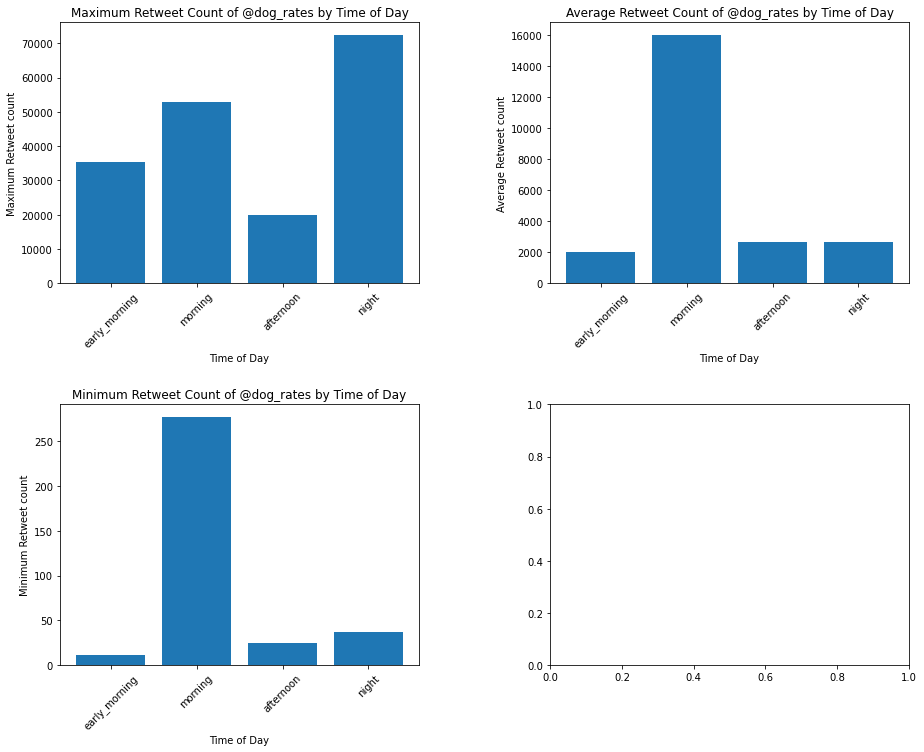

In [77]:
# Plotting with plt.subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.tight_layout(pad=10.0)

# Maximum retweet count
axs[0][0].bar(time_category_max, retweet_counts_max);
axs[0][0].set_title('Maximum Retweet Count of @dog_rates by Time of Day');
axs[0][0].set(xlabel='Time of Day', ylabel='Maximum Retweet count');
axs[0][0].tick_params(axis='x', rotation=45);

# Average retweet count
axs[0][1].bar(time_category_avg, retweet_counts_avg);
axs[0][1].set_title('Average Retweet Count of @dog_rates by Time of Day');
axs[0][1].set(xlabel='Time of Day', ylabel='Average Retweet count');
axs[0][1].tick_params(axis='x', rotation=45);

# Minimum retweet count
axs[1][0].bar(time_category_min, retweet_counts_min);
axs[1][0].set_title('Minimum Retweet Count of @dog_rates by Time of Day');
axs[1][0].set(xlabel='Time of Day', ylabel='Minimum Retweet count');
axs[1][0].tick_params(axis='x', rotation=45);

> @dog_rates seems to be getting high retweets around morning, from 6:00 AM to 12:00 PM, but this might be due to the very few tweets he has for this time range, about 4 tweets, and so there is not soo much to get an average on. 
>
> However, on average, he seems to be getting an equal number of retweet for all his tweets independent of the time to day it is.

#### What year did @dog_rates get his most retweets on average?

In [78]:
# Add year to DataFrame
df_archive_copy['year'] = df_archive_copy.timestamp.dt.year

# Get average retweet counts for each year category
retweet_counts_year = df_archive_copy.groupby('year').retweet_count.mean().values
year_category = df_archive_copy.groupby('year').retweet_count.mean().index

retweet_counts_year, year_category

(array([ 912.12143928, 2369.28435115, 4952.33783784]),
 Int64Index([2015, 2016, 2017], dtype='int64', name='year'))

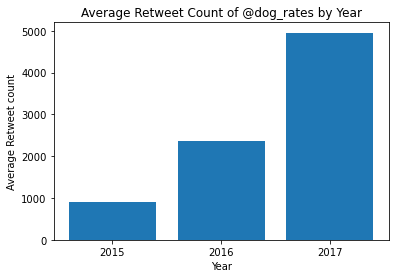

In [79]:
# Plotting
year_label = ['2015', '2016', '2017']

plt.bar(year_category, retweet_counts_year);
plt.title('Average Retweet Count of @dog_rates by Year');
plt.xlabel('Year');
plt.xticks(year_category, year_label)
plt.ylabel('Average Retweet count');

> The average retweet of @dog_rates increases with year which should be expected since his followership increases with time.

#### What month does @dog_rates get his most retweets on average?

In [80]:
# Add month to DataFrame
df_archive_copy['month'] = df_archive_copy.timestamp.dt.month

month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Get average retweet counts for each year category
retweet_counts_month = df_archive_copy.groupby('month').retweet_count.mean().values
month_category = df_archive_copy.groupby('month').retweet_count.mean().index

retweet_counts_month, month_category

(array([2404.57142857, 2079.74731183, 2145.7032967 , 2775.06862745,
        3826.96078431, 4258.69343066, 3599.91780822, 3040.41935484,
        2949.05882353, 3896.70422535,  996.73428571, 1741.1147541 ]),
 Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month'))

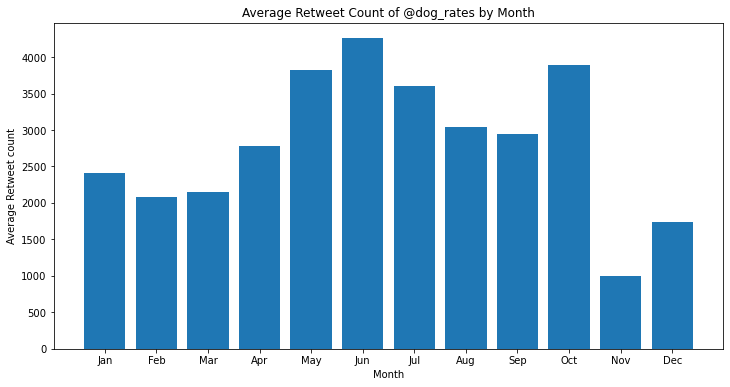

In [81]:
plt.figure(figsize=(12, 6))
plt.bar(month_category, retweet_counts_month);
plt.title('Average Retweet Count of @dog_rates by Month');
plt.xlabel('Month');
plt.xticks(month_category, month_label)
plt.ylabel('Average Retweet count');

> @dog_rates gets his most retweets in the months of `May`, `June` and `October` and his least in `November`.

#### What dog stage gets the most `rating` on average from @dog_rates?
> We'll perform this analysis for dog_stages with single stage values.

In [82]:
# Select rows with single 'dog_stage'
mask = ~df_archive_copy.query('dog_stage == dog_stage').dog_stage.str.contains(', ')
index = mask[mask].index
index

Int64Index([   9,   12,   14,   28,   39,   42,   45,   51,   64,   72,
            ...
            1717, 1718, 1722, 1728, 1729, 1732, 1739, 1746, 1752, 1754],
           dtype='int64', length=323)

In [83]:
# Get dataframe of interest
df_interest = df_archive_copy.loc[index]
df_interest.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,time_category,year,month
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,6222,28519,afternoon,2017,7
12,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10,NaN,puppo,8539,42890,early_morning,2017,7
14,889531135344209921,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10,Stuart,puppo,1919,13589,afternoon,2017,7
28,886366144734445568,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10,Roscoe,pupper,2692,18902,night,2017,7
39,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,2544,18294,night,2017,7


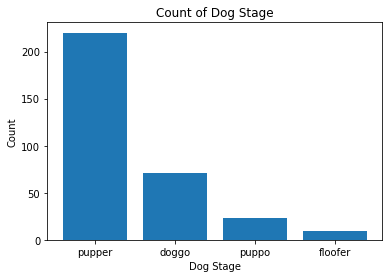

In [84]:
# Count dog_stage
count_dog_stage = df_interest.dog_stage.value_counts()

# Lets visual the representation of each dog_stage in the data
plt.bar(count_dog_stage.index, count_dog_stage)
plt.xlabel('Dog Stage');
plt.ylabel('Count');
plt.title('Count of Dog Stage');

> `pupper` is more represented in the data than other dog_stages and `floofer` is the least represented.

In [85]:
# Get average rating_numerator for each dog_stage
avg_rating = df_interest.groupby('dog_stage').rating_numerator.mean()

avg_rating.index, avg_rating.values

(Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object', name='dog_stage'),
 array([11.83098592, 11.88888889, 10.73759091, 12.        ]))

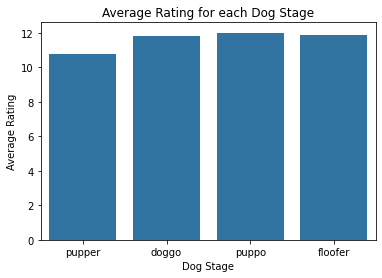

In [86]:
# Select base color palette 
base_color = sns.color_palette()[0]

# Ploting average rating_numerator for each dog stage
sns.barplot(x=avg_rating.index, y=avg_rating.values, order=count_dog_stage.index, color=base_color)
plt.title('Average Rating for each Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Rating');

> Each dog stage, on average, got roughly the same rating from @dog_rates with `pupper` being the most represented in our data.

### Insights:
> 1. Seems @dog_rates is a night owl with most of his post at night and in the early hours of the morning. From **6:00 PM to 6:00 AM**.
>
>
> 2. @dog_rates seems to be getting high retweets around morning, from 6:00 AM to 12:00 PM, but this might be due to the very few tweets he has for this time range, about 4 tweets, and so there is not soo much to get an average on. 
>
>    However, on average, he seems to be getting an equal number of retweet for all his tweets independent of the time to day it is.
>
>
> 3. The average retweet of @dog_rates increases with year which should be expected since his followership increases with time. However, @dog_rates gets his most retweets in the months of `May`, `June` and `October` and his least in `November`.
>
>
> 4. `pupper` is more represented in the data than other dog_stages and `floofer` is the least represented.
> 
>    Each dog stage, on average, got roughly the same rating from @dog_rates with `pupper` having a slightly less rating than others. This might be due to the fact that `pupper` is the most represented in the dataset.